In [2]:
import pandas as pd
superstore_data = pd.read_excel('Superstore-Dataset.xls')
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


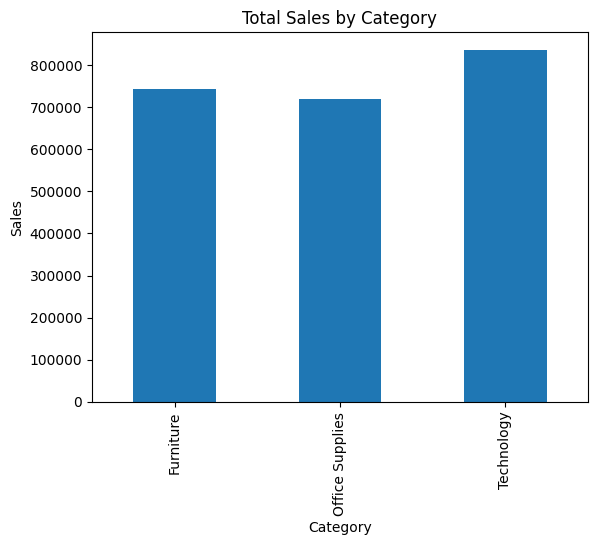

In [4]:
# plotting basic bar plot 
import matplotlib.pyplot as plt

category_sales = superstore_data.groupby("Category")['Sales'].sum()
category_sales.plot(kind = 'bar')

plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

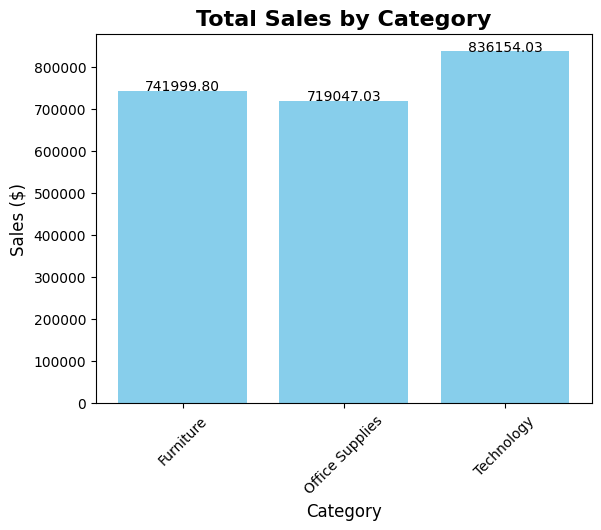

In [15]:
plt.bar(category_sales.index, category_sales.values, color='skyblue')
plt.title('Total Sales by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.xticks(rotation=45)
for i, value in enumerate(category_sales.values):
    plt.text(i, value + 500, f'{value:.2f}', ha='center')
plt.show()


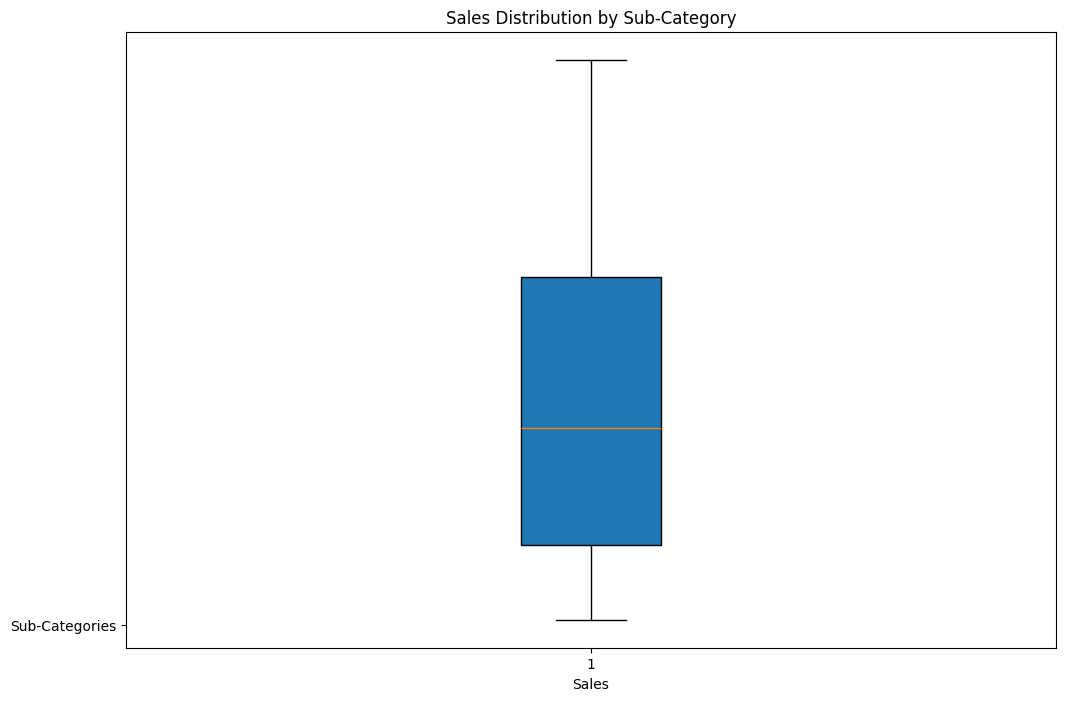

In [18]:
sub_category_sales = superstore_data.groupby('Sub-Category')['Sales'].sum()
plt.figure(figsize=(12, 8))
plt.boxplot(sub_category_sales.values, vert=True, patch_artist=True)
plt.title('Sales Distribution by Sub-Category')
plt.xlabel('Sales')
plt.yticks([1], ['Sub-Categories'])
plt.show()


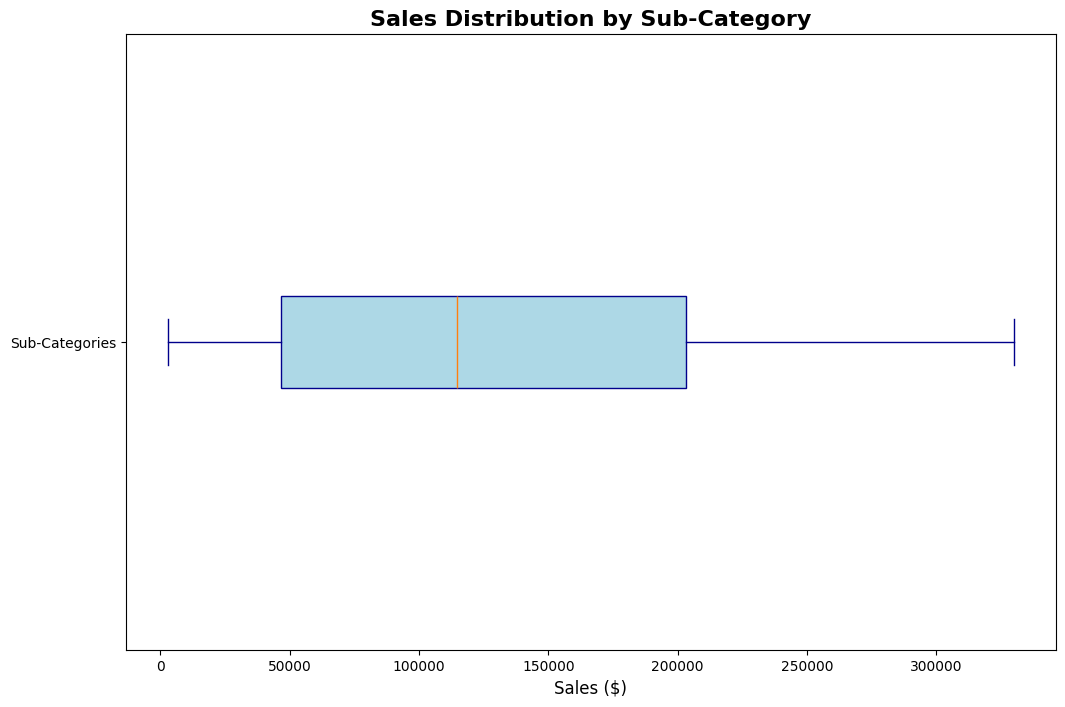

In [17]:
plt.figure(figsize=(12, 8))
plt.boxplot(sub_category_sales.values, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='darkblue'),
            whiskerprops=dict(color='darkblue'),
            capprops=dict(color='darkblue'),
            flierprops=dict(marker='o', color='darkblue', alpha=0.5))
plt.title('Sales Distribution by Sub-Category', fontsize=16, fontweight='bold')
plt.xlabel('Sales ($)', fontsize=12)
plt.yticks([1], ['Sub-Categories'])
plt.show()


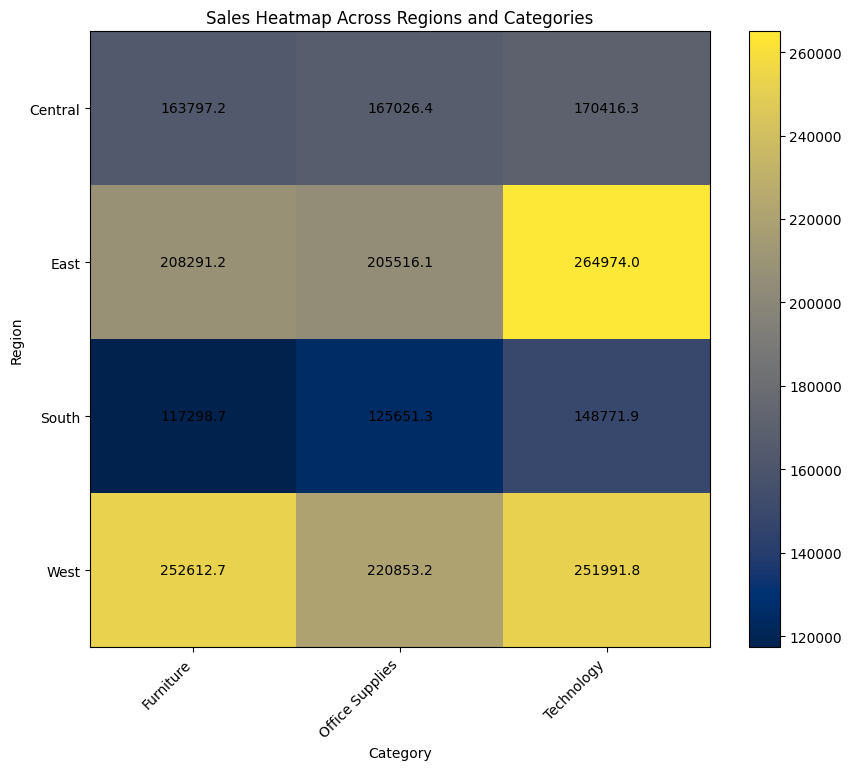

In [6]:
# Task 4 -  lab - creating heat map using chatgpt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = 'Superstore-Dataset.xls'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

# Grouping the data by 'Region' and 'Category' and summing the 'Sales'
pivot_table = df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')

# Generate the heatmap using matplotlib
plt.figure(figsize=(10, 8))

# Use imshow to display the heatmap
plt.imshow(pivot_table, cmap='cividis', aspect='auto')

# Add color bar
plt.colorbar()

# Add labels for the regions and categories
plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(pivot_table.index)), labels=pivot_table.index)

# Add labels
plt.xlabel('Category')
plt.ylabel('Region')
plt.title('Sales Heatmap Across Regions and Categories')

# Add the text annotations (values) on the heatmap
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, f'{pivot_table.iloc[i, j]:.1f}', ha='center', va='center', color='black')

plt.show()


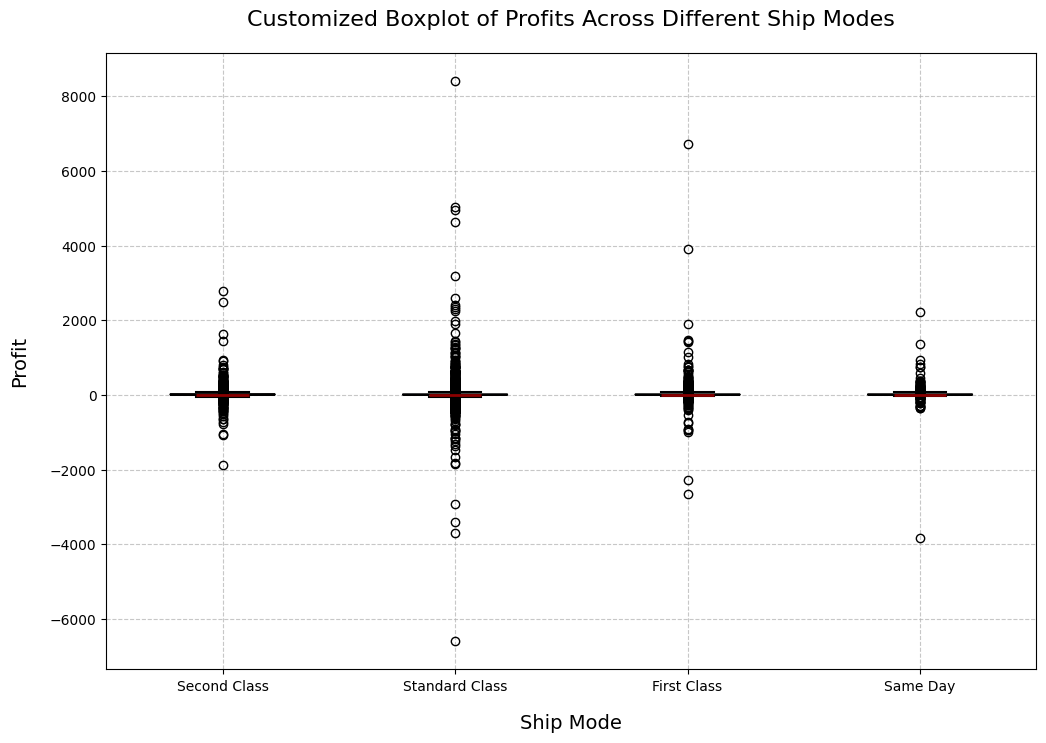

In [9]:
# Task 4

import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Superstore-Dataset.xls'
df = pd.read_excel(file_path)

# Generate the customized boxplot
plt.figure(figsize=(12, 8))

# Define custom colors for the boxplot
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# Create the boxplot with customizations
box = plt.boxplot([df[df['Ship Mode'] == mode]['Profit'] for mode in df['Ship Mode'].unique()],
                  tick_labels=df['Ship Mode'].unique(), notch=True, patch_artist=True)

# Customize each box with a different color
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize whiskers, medians, and caps
plt.setp(box['whiskers'], color='black', linewidth=1.5)
plt.setp(box['medians'], color='darkred', linewidth=2)
plt.setp(box['caps'], color='black', linewidth=1.5)

# Add labels and title with custom font size
plt.xlabel('Ship Mode', fontsize=14, labelpad=15)
plt.ylabel('Profit', fontsize=14, labelpad=15)
plt.title('Customized Boxplot of Profits Across Different Ship Modes', fontsize=16, pad=20)

# Show the plot
plt.show()


In [35]:
import pandas as pd
import plotly.graph_objects as go

# Load the Excel file
file_path = 'Superstore-Dataset.xls'
df = pd.read_excel(file_path)

# Prepare the data for the Sankey diagram
# We'll group by 'Category' and 'Region' to see the flow of products
grouped_df = df.groupby(['Category', 'Region']).size().reset_index(name='Count')

# Define nodes (categories and regions)
categories = list(grouped_df['Category'].unique())
regions = list(grouped_df['Region'].unique())

# Create lists for Sankey nodes and links
nodes = categories + regions

# Create node indices
node_indices = {node: i for i, node in enumerate(nodes)}

# Define the sources and targets
sources = [node_indices[category] for category in grouped_df['Category']]
targets = [node_indices[region] for region in grouped_df['Region']]

# Define the flow values
values = grouped_df['Count']

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

# Set the title
fig.update_layout(title_text="Basic Sankey Diagram: Product Flow from Categories to Regions", font_size=10)

# Show the diagram
fig.show()


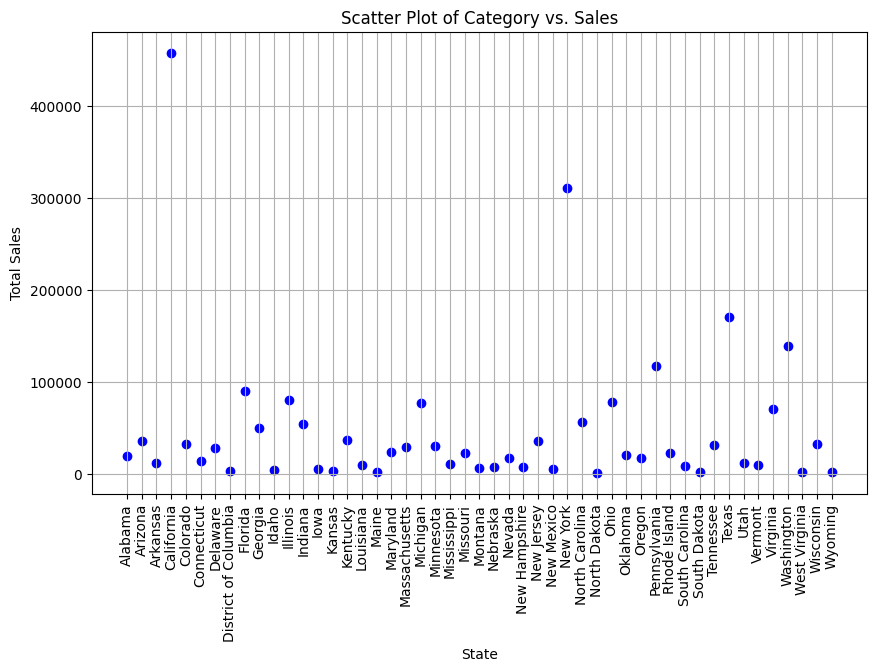

In [40]:
import numpy as np
category_sales = df.groupby('State')['Sales'].sum().reset_index()

x = category_sales['State']
y = category_sales['Sales']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', marker='o')

plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Scatter Plot of Category vs. Sales')
plt.xticks(rotation=90)
plt.grid(True)

plt.show()
